
# Project: TMBD Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.
In this data, I will be asking the questions:
1. Most popular movies year in year out
2. Relationship between budgets and revenues (do movies with higher budgets get higher revenues)
3. Are movies with higher budgets more popular

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

Loading data and getting info on the data to know the form of the data and observe for missing values

In [81]:
df_movies = pd.read_csv("tmdb-movies.csv", parse_dates=['release_date'])
df_movies.head(3)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

Description of the data

In [82]:
df_movies.describe()
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


# 

## Data Cleaning

Cleaning the data. Removing columns I won't need in answering my questions
i.e - 'imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production companies','runtime'



In [83]:
df_movies.dropna(axis=1, inplace=True)
df_movies.head(1)
df_movies.drop('runtime', axis=1, inplace=True)
df_movies.head(1)

,id,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Most popular movies year in year out

In [84]:
df_movies.head(2)

,id,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Find out the total number of years

In [105]:
df_movies['release_year'].nunique()

56

In [123]:
df_movies['release_year'].min()

1960

In [124]:
df_movies['release_year'].max()

2015

Get the most popular movies for each year from 1960 - 2015 - 58 years

In [121]:
most_popular_movies = df_movies.groupby(['release_year'])['popularity','original_title','id'].max()
most_popular_movies

C:\Users\User\anaconda3\envs\ALX3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,popularity,original_title,id
release_year,,,
1960,2.610362,Village of the Damned,43040
1961,2.631987,West Side Story,43020
1962,3.170651,What Ever Happened to Baby Jane?,45267
1963,2.508235,X: The Man with the X-Ray Eyes,42987
1964,3.153791,Zulu,53021
1965,1.910465,What's New Pussycat?,42745
1966,1.227582,Winnie the Pooh and the Honey Tree,42701
1967,2.550704,You Only Live Twice,48784
1968,3.309196,"Yours, Mine and Ours",48714


### Relationship between budgets and revenues (do movies with higher budgets get higher revenues?)


In [126]:
df_movies.head(3)

,id,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


Get the higher budgets

In [ ]:
higher_bug =df_movies['budget'].sort_values(ascending = False)

Get the higher revenue

In [223]:
higher_revenue =df_movies['revenue'].sort_values(ascending = False)

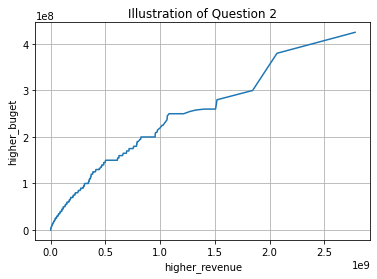

In [226]:
plt.plot(higher_revenue ,higher_bug)
plt.xlabel('higher_revenue')
plt.ylabel('higher_buget')
plt.title('Illustration of Question 2')
plt.grid(True)
plt.savefig("Question 2.png")
plt.show()

### Are movies with higher budgets more popular?

In [219]:
higher_bug =df_movies['budget'].sort_values(ascending = False)

Get the higher budgets

In [ ]:
more_popular =df_movies['popularity'].sort_values(ascending = False)

Get the most popular movies

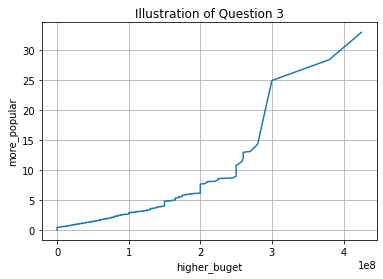

In [225]:
plt.plot(higher_bug, more_popular)
plt.xlabel('higher_buget')
plt.ylabel('more_popular')
plt.title('Illustration of Question 3')
plt.grid(True)
plt.savefig("Question 3.png")
plt.show()

Plot in a graph

<a id='conclusions'></a>
## Conclusions

In conclusion, answers to the questions:

Question 2: The result of the analysis goes to show that movies with the  highest budgets end up getting highest revenue.

Question 3: The result of the analysis goes to show that movies with the highest budgets are the most popular.